In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# Category = {0:Fals, 1:True}
Y = np.array([[1,0],
              [0,1],
              [0,1],
              [0,1]])

In [6]:
# activate function 필요해서 함수 하나 만들거임
# 하지말자고 하심....

In [36]:
np.max(np.array([[1,2,3],[2,3,4]]), axis=1, keepdims=True)

array([[3],
       [4]])

In [43]:
# softmax 하나 만들어줄거임.
def softmax(A):
    A - np.max(A, axis=1, keepdims=True)
    return np.exp(A)/np.sum(np.exp(A), axis=1, keepdims=True)


In [44]:
#logistic 도 하나 만들어줄거임.
def logistic(A):
    return 1/(1+np.exp(-A))

In [50]:
W = np.random.rand(2,2) # X를 2개 받아서 Y를 2개 만들어야함.
B = np.random.rand(1,2) # Bias

lr = 1e-3
epoch = 500000

history = list()

for i in range(epoch):
    Z = logistic(X.dot(W)+B)
    # Z = X.dot(W) + B
    Yhat = softmax(Z)

    # if i%100 == 0:
    history.append(-np.sum(Y*np.log(Yhat+1e-100)))

    dY = -(Y-Yhat)
    dZ = logistic(dY*(1-dY))
    W = W - lr*X.T.dot(dZ*dY)
    B = B - lr*np.sum(dZ*dY, axis=0)


In [51]:
Yhat

array([[0.40111634, 0.59888366],
       [0.26894142, 0.73105858],
       [0.26894142, 0.73105858],
       [0.26894142, 0.73105858]])

In [52]:
softmax(X.dot(W)+B) > .5

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

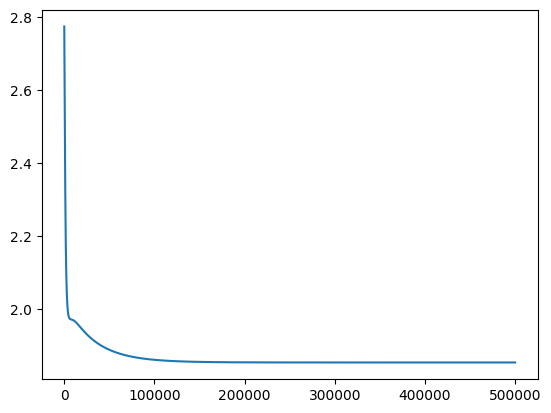

In [53]:
plt.plot(range(len(history)), history)